<a href="https://colab.research.google.com/github/RohanCheera/Sentiment-Analysis/blob/main/Google_Play_Store_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Google Play Store Sentiment Analysis using Python**



**Sentiment analysis**, a vital aspect of Natural Language Processing (NLP), involves classifying customer reviews or comments as positive, negative, and sometimes neutral. For businesses, understanding customer sentiments regarding their products or services is crucial for meeting customer expectations and making informed decisions. With millions of apps available on the Google Play Store, conducting sentiment analysis offers valuable insights into user opinions.

In this article, we will guide you through the process of performing sentiment analysis on Google Play Store app reviews using Python.

**Google Play Store Sentiment Analysis:**

The Google Play Store serves as the official app store for Android devices, making it a treasure trove of user reviews and ratings. Analyzing customer reviews is a common application of sentiment analysis, helping app developers and businesses understand user sentiment towards specific apps.

**Data Retrieval**

To begin our analysis, we need to access the Google Play Store reviews dataset. We can accomplish this by using Python's requests library to fetch the data from a CSV file hosted on a platform like GitHub. Once retrieved, we will load the data into a Pandas DataFrame for further examination.

In [ ]:
import pandas as pd
import requests
import io

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/user_reviews.csv"
response = requests.get(url)

if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
    print("Data loaded successfully.")
else:
    print("Failed to fetch data.")


Data loaded successfully.


In [ ]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Data Cleaning**

Before diving into sentiment analysis, it's essential to ensure data quality. Checking for missing values and handling them appropriately is a crucial step.

In [ ]:
data.size

321475

In [ ]:
from itertools import count
from nltk.util import pr

In [ ]:
print(data.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
data=data.dropna()
print(data.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


 **Sentiment Analysis**

To perform sentiment analysis, we'll use the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from the NLTK library. We'll analyze each review's sentiment and add columns for positive, negative, and neutral sentiments.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]
print(data.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Positive  Negative  \
0  Positive                1.00                0.533333     0.534       0.0   
1  Positive                0.25                0.288462     0.519       0.0   
3  Positive                0.40                0.875000     0.451       0.0   
4  Positive                1.00                0.300000     0.677       0.0   
5  Positive                1.00                0.300000     0.808       0.0   

   Neutral  
0    0.466  
1    0.481  
3    0.549 

**Visualization**

Visualizing sentiment analysis results can provide valuable insights. We can create a scatter plot to showcase the sentiment polarity and subjectivity of the reviews, color-coded by sentiment labels.

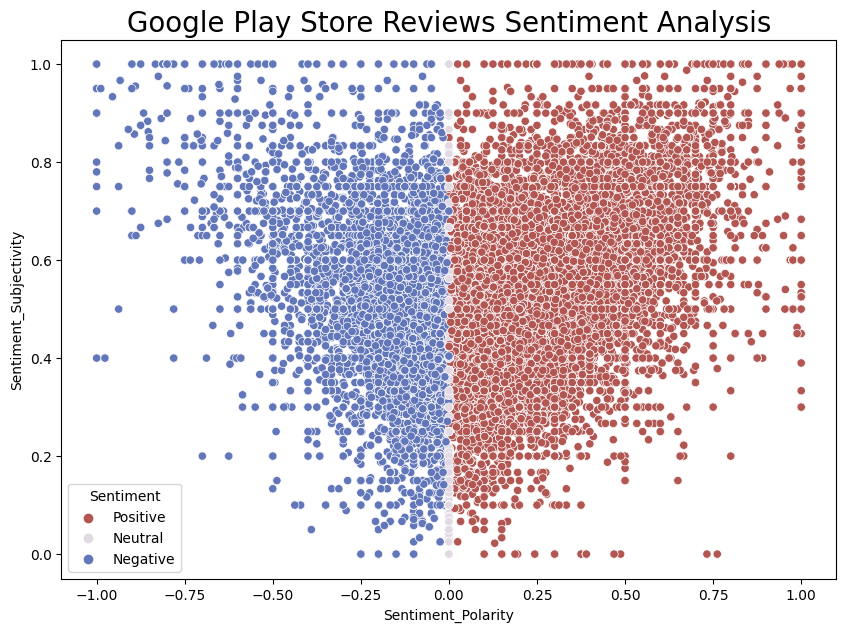

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
# sns.scatterplot(data['Sentiment_Polarity'], data['Sentiment_Subjectivity'],
#                 hue = data['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
sns.scatterplot(data=data, x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment', edgecolor='white', palette="twilight_shifted_r")

plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

**Conclusion:**


Sentiment analysis allows us to understand the sentiments expressed in Google Play Store reviews. By fetching, cleaning, and analyzing the data, we gain valuable insights into user opinions about various apps. This analysis empowers developers and businesses to make data-driven decisions, enhancing user satisfaction and app quality.

We hope you found this article insightful for analyzing Google Play Store sentiments using Python. If you have any questions or comments, please feel free to share them in the comments section below.

Happy analyzing!





